In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas import Series


In [3]:
#Set PANDAS to show all columns in DataFrame
pd.set_option('display.max_columns', None)

In [4]:
pd.__version__

'1.2.4'

In [5]:
import calendar

# Import graphing packages

We'll be producing some figures at the end of this tutorial so we need to import various graphing capabilities. The default Matplotlib library is solid.


In [7]:
import matplotlib
print(matplotlib.__version__)

3.3.4


In [13]:
import matplotlib.pyplot as plt
import matplotlib as mpl

In [14]:
#NECESSARY FOR XTICKS OPTION, ETC.
from pylab import*

One of the great innovations of ipython notebook is the ability to see output and graphics "inline," that is, on the same page and immediately below each line of code. To enable this feature for graphics we run the following line.

In [15]:
%matplotlib inline  

We will be using Seaborn to help pretty up the default Matplotlib graphics. Seaborn does not come installed with Anaconda Python so you will have to open up a terminal and run pip install seaborn.

In [16]:
import seaborn as sns
print(sns.__version__)

0.11.1


The following line will set the default plots to be bigger.

In [17]:
plt.rcParams['figure.figsize'] = (15, 5)

In [18]:
mpl.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

# Read in data

we can see in the operations below this dataframe contains 18 variables for 49,054 tweets.
We can use the len function again here to see how many columns there are in the dataframe

In [24]:
df = pd.read_csv('MOI-tweets.csv')
print(len(df.columns))
print(len(df))
df.head(2)


18
49054


,Unnamed: 0,id_str,retweet_count,favorite_count,replyCount,quoteCount,user.screen_name,datenew,created_at,datecreatetweetold,text,datecreateuserold,user.created_at,engagments,day,month,year,url
0,3,1448997995475881988,5223,7173,1126.0,740.0,MOISaudiArabia,2021-10-15,Fri Oct 15 13:03:37 +0000 2021,16 days 10:56:23,تخفيف الاحترازات الصحية في المملكة، وذلك ابتدا...,2625 days 15:20:13,Sun Aug 24 08:39:47 +0000 2014,14262.0,15,10,2021,https://twitter.com/MOISaudiArabia/status/1448...
1,55,1441521487970639877,4436,8179,957.0,405.0,MOISaudiArabia,2021-09-24,Fri Sep 24 21:54:39 +0000 2021,37 days 02:05:21,نظام مكافحة جريمة التحرش..\n\n#وزارة_الداخلية ...,2625 days 15:20:13,Sun Aug 24 08:39:47 +0000 2014,13977.0,24,9,2021,https://twitter.com/MOISaudiArabia/status/1441...


# List all the columns in the DataFrame

In [21]:
df.columns

Index(['Unnamed: 0', 'id_str', 'retweet_count', 'favorite_count', 'replyCount',
       'quoteCount', 'user.screen_name', 'datenew', 'created_at',
       'datecreatetweetold', 'text', 'datecreateuserold', 'user.created_at',
       'engagments', 'day', 'month', 'year', 'url'],
      dtype='object')

And we can see what types of variable each column is -- an integer (int64), a numerical float variable (float), or a text variable (object).

In [27]:
df.dtypes

Unnamed: 0              int64
id_str                  int64
retweet_count           int64
favorite_count          int64
replyCount            float64
quoteCount            float64
user.screen_name       object
datenew                object
created_at             object
datecreatetweetold     object
text                   object
datecreateuserold      object
user.created_at        object
engagments            float64
day                     int64
month                   int64
year                    int64
url                    object
dtype: object

# Convert created_at to time variable

To work with time, we first have to have a variable in our dataframe that indicates time. We will use the created_at column, which represents the time at which the tweet was created. In the following line we will convert this variable from text format to python's datetime format.


In [37]:
df.dtypes[:9]

Unnamed: 0                        int64
id_str                            int64
retweet_count                     int64
favorite_count                    int64
replyCount                      float64
quoteCount                      float64
user.screen_name                 object
datenew                          object
created_at          datetime64[ns, UTC]
dtype: object

In [39]:
df['created_at'] = pd.to_datetime(df['created_at'])

# Set the Index

in PANDAS we need to set an index to your dataframe. This will allow us to manipulate the data by time.


In [40]:
df = df.set_index(['created_at'])
df.head(2)

,Unnamed: 0,id_str,retweet_count,favorite_count,replyCount,quoteCount,user.screen_name,datenew,datecreatetweetold,text,datecreateuserold,user.created_at,engagments,day,month,year,url
created_at,,,,,,,,,,,,,,,,,
2021-10-15 13:03:37+00:00,3,1448997995475881988,5223,7173,1126.0,740.0,MOISaudiArabia,2021-10-15,16 days 10:56:23,تخفيف الاحترازات الصحية في المملكة، وذلك ابتدا...,2625 days 15:20:13,Sun Aug 24 08:39:47 +0000 2014,14262.0,15,10,2021,https://twitter.com/MOISaudiArabia/status/1448...
2021-09-24 21:54:39+00:00,55,1441521487970639877,4436,8179,957.0,405.0,MOISaudiArabia,2021-09-24,37 days 02:05:21,نظام مكافحة جريمة التحرش..\n\n#وزارة_الداخلية ...,2625 days 15:20:13,Sun Aug 24 08:39:47 +0000 2014,13977.0,24,9,2021,https://twitter.com/MOISaudiArabia/status/1441...


# Generate and Plot Number of Tweets over Different Time Periods




In [43]:
def f(x):
     return Series(dict(Number_of_tweets = x['text'].count(),))

# Generate and Plot Daily Counts

First, let's analyze the data by day of the year. To do this, we need to convert our tweet-level dataset -- a dataset where each row is dedicated to one of the 49,054 tweets -- to a daily dataset. This process is called aggregation and the output will be a new dataframe with 365 rows -- one per day.


we are accessing the "date" element of our index variable 


In [45]:
daily_count = df.groupby(df.index.date).apply(f)
print(len(daily_count))
daily_count.head(5)

62


,Number_of_tweets
2021-09-01,695
2021-09-02,560
2021-09-03,568
2021-09-04,1020
2021-09-05,787


we will see above that the index column (in bold) is the date. Let's give a name to this index and then inspect the first five rows in the dataframe.

In [46]:
daily_count.index.name = 'date'
daily_count.head(5)

,Number_of_tweets
date,
2021-09-01,695
2021-09-02,560
2021-09-03,568
2021-09-04,1020
2021-09-05,787



It's always good to inspect your data to do that it worked as expected Let's now look at the last five rows of the dataframe.


In [47]:
daily_count.tail(5)

,Number_of_tweets
date,
2021-10-28,391
2021-10-29,477
2021-10-30,969
2021-10-31,1464
2021-11-01,246


OK, that's exactly what we were expecting, too. Let's run two more lines of code to see what the minimum and maximum daily values are in the dataset.

In [48]:
daily_count.index.min()

datetime.date(2021, 9, 1)

In [49]:
daily_count.index.max()

datetime.date(2021, 11, 1)

Perfect. We're all set. Now let's plot it.

In the code block below I modify the transparency of the graph (using "alpha"), change the font size and the rotation of the x-axis ticks labels, add/change the y-axis and x-axis headings, make them bold, and add some extra spacing. I then save the output as a .png file that you can then insert into your Word or LaTeX file. I have left the title out of these figures 

and I have added comments to the code below.

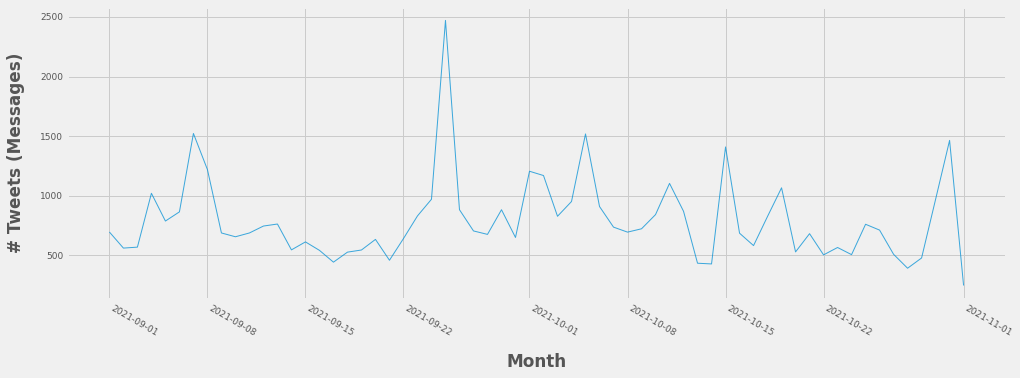

In [87]:
daily_plot = daily_count['Number_of_tweets'].plot(kind='line', lw=1, alpha=0.75, legend=True, x_compat=True)

daily_plot.set_xlabel('Month', weight='bold', labelpad=15)    #SET X-AXIS LABEL; ADD PADDING TO TOP OF LABEL
daily_plot.set_ylabel('# Tweets (Messages)', weight='bold', labelpad=15) #SET Y-AXIS LABEL; ADD PADDING TO RIGHT OF LABEL

xticks(fontsize = 9, rotation = -30, ha ="left")  #SET FONT PROPERTIES OF X-AXIS TICK LABELS
yticks(fontsize = 9)                              #SET FONT PROPERTIES OF Y-AXIS TICK LABELS

#http://matplotlib.org/users/legend_guide.html
#http://nbviewer.ipython.org/gist/olgabot/5357268  ### LIST OF OPTIONS
#legend(fontsize='x-small',loc=2,labelspacing=0.1, frameon=False)#.draggable()
daily_plot.legend_ = None
daily_plot.tick_params(axis='x', pad=5) #SET PADDING ABOVE X-AXIS LABELS
#Set x axis label on top of plot
#daily_plot.xaxis.set_label_position('top')

savefig('daily counts.png', bbox_inches='tight', dpi=300, format='png')   #SAVE PLOT IN PNG FORMAT

Generate and Plot Day-of-the-Week Tweets



In [52]:
weekday_count = df.groupby(df.index.weekday).apply(f)
print(len(weekday_count))
weekday_count

7


,Number_of_tweets
created_at,
0,6849
1,7364
2,6426
3,5502
4,6923
5,8814
6,7176


In the datetime variable, '0' is Monday and '6' is Sunday. Let's add another column to our new dataframe with the names of the days of the week. The first line creates a Python list with 7 elements, the second line adds a new column "day" to the dataframe and fills it with the values in the list (called "days") we created in the first line. The third line displays the updated dataframe.

In [53]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_count['day'] = days
weekday_count

,Number_of_tweets,day
created_at,,
0,6849,Monday
1,7364,Tuesday
2,6426,Wednesday
3,5502,Thursday
4,6923,Friday
5,8814,Saturday
6,7176,Sunday


Let's plot these data. We'll use a bar graph here.

One change you'll notice is that we are not using the index column for our x-axis labels but rather the labels in our new "day" column. The second line in the block of code below takes care of this.

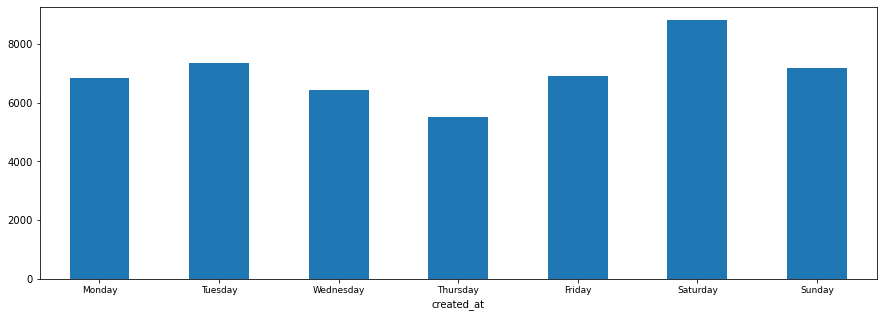

In [54]:
day_of_week_plot = weekday_count['Number_of_tweets'].plot(kind='bar')
xticks(np.arange(7), weekday_count['day'], rotation = 0, fontsize = 9) #, ha ="left") 

###IF WE DON'T WANT TO CREATE ANOTHER COLUMN IN DATAFRAME WE CAN SET CUSTOM LABELS
#days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
#xticks(np.arange(7), days, rotation = 0,fontsize = 9) #, ha ="left") 

savefig('day-of-week counts.png', bbox_inches='tight', dpi=300, format='png')

Hour-of-Day Counts

We might also be interested in the hour of the day that the tweets are sent. We only need to access our index's hour attribute to accomplish this.


In [56]:
hourly_count = df.groupby(df.index.hour).apply(f)
print(len(hourly_count))
hourly_count

24


,Number_of_tweets
created_at,
0,1028
1,887
2,962
3,972
4,980
5,1248
6,1333
7,1585
8,1706


Now let's plot the data. First let's try the default plot. As you'll see, it's a line plot with ticks every five hours. 

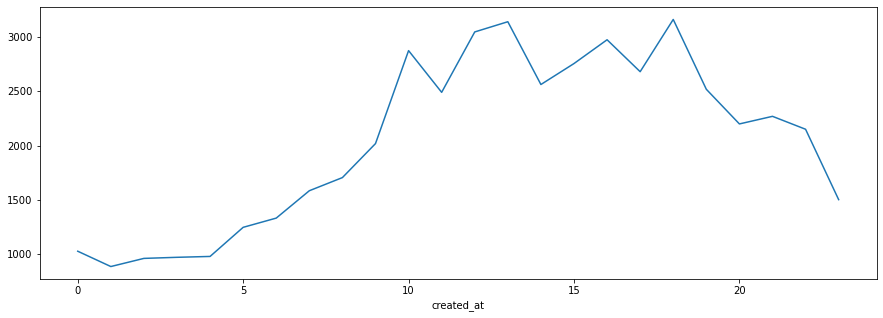

In [57]:
hourly_plot = hourly_count['Number_of_tweets'].plot()

<br>We can show ticks for each hourby adding a line of code. 

([<matplotlib.axis.XTick at 0x25569cc7460>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

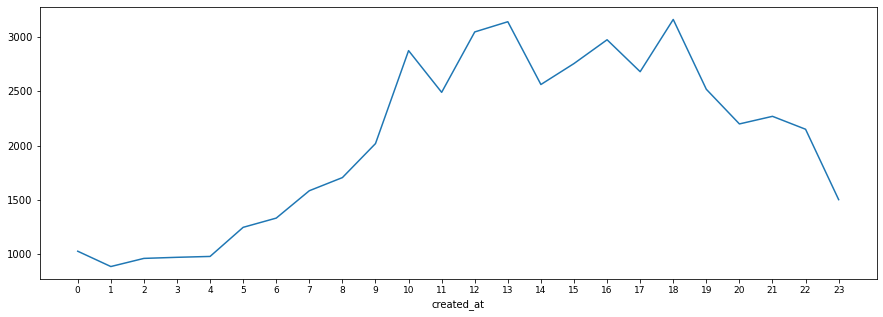

In [58]:
hourly_plot = hourly_count['Number_of_tweets'].plot()
xticks(np.arange(24), rotation = 0,fontsize = 9) #, ha ="left") 

However, it is showing the hours in the "pythonic" way -- from 0 to 23. We can fix that by adding a list with the hours 1-24 and then invoking that list in our xticks command. The plot below also adds labels for the x and y axes and saves the output in PNG format.` 

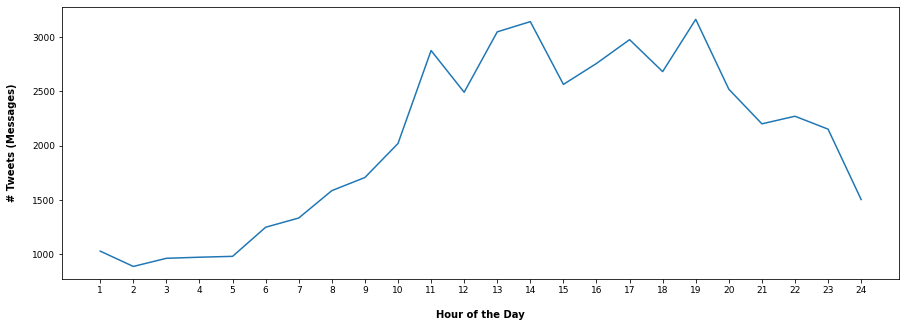

In [59]:
hourly_plot = hourly_count['Number_of_tweets'].plot(kind='line')
hours = list(range(1,25))                                                #GENERATE LIST FROM 1 TO 24
xticks(np.arange(24), hours, rotation = 0,fontsize = 9)                  #USE THE CUSTOM TICKS

hourly_plot.set_xlabel('Hour of the Day', weight='bold', labelpad=15)     #SET X-AXIS LABEL, ADD PADDING TO TOP OF X-AXIS LABEL
hourly_plot.set_ylabel('# Tweets (Messages)', weight='bold', labelpad=15) #SET Y-AXIS LABEL, ADD PADDING TO RIGHT OF Y-AXIS LABEL

xticks(fontsize = 9, rotation = 0, ha= "center")                          #SET FONT SIZE FOR X-AXIS TICK LABELS
yticks(fontsize = 9)                                                      #SET FONT SIZE FOR Y-AXIS TICK LABELS
daily_plot.tick_params(axis='x', pad=5)                                   #SET PADDING ABOVE X-AXIS LABELS

daily_plot.legend_ = None                                                 #TURN OFF LEGEND

savefig('hourly counts - line graph.png', bbox_inches='tight', dpi=300, format='png')


It's then easy to copy the above code block and change it to a bar graph by adding kind='bar' to the first line.


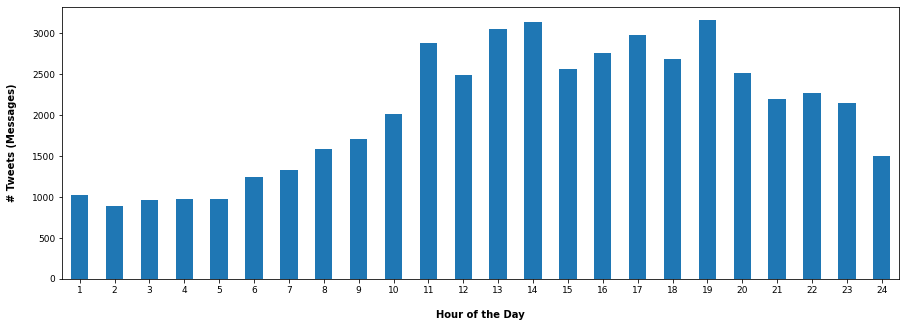

In [60]:
hourly_plot = hourly_count['Number_of_tweets'].plot(kind='bar')
hours = list(range(1,25))                                                 #GENERATE LIST FROM 1 TO 24
xticks(np.arange(24), hours, rotation = 0,fontsize = 9)                   #USE THE CUSTOM TICKS

hourly_plot.set_xlabel('Hour of the Day', weight='bold', labelpad=15)     #SET X-AXIS LABEL, ADD PADDING TO TOP OF X-AXIS LABEL
hourly_plot.set_ylabel('# Tweets (Messages)', weight='bold', labelpad=15) #SET Y-AXIS LABEL, ADD PADDING TO RIGHT OF Y-AXIS LABEL

xticks(fontsize = 9, rotation = 0, ha= "center")                          #SET FONT SIZE FOR X-AXIS TICK LABELS
yticks(fontsize = 9)                                                      #SET FONT SIZE FOR Y-AXIS TICK LABELS
daily_plot.tick_params(axis='x', pad=5)                                   #SET PADDING ABOVE X-AXIS LABELS

daily_plot.legend_ = None                                                 #TURN OFF LEGEND

savefig('hourly counts - bar graph.png', bbox_inches='tight', dpi=300, format='png')

Generate Monthly Tweet Count

Generating a count by month follows the same process.


In [62]:
monthly_count = df.groupby(df.index.month).apply(f)
print(len(monthly_count))
monthly_count

3


,Number_of_tweets
created_at,
9,23775
10,25033
11,246


Using basically the same code as above, we can plot a bar graph of these data. The one change is the second line of code -- here we use the calendar package to help generate a list of the months of the year. Python has a ton of such specialized packages to help same save.

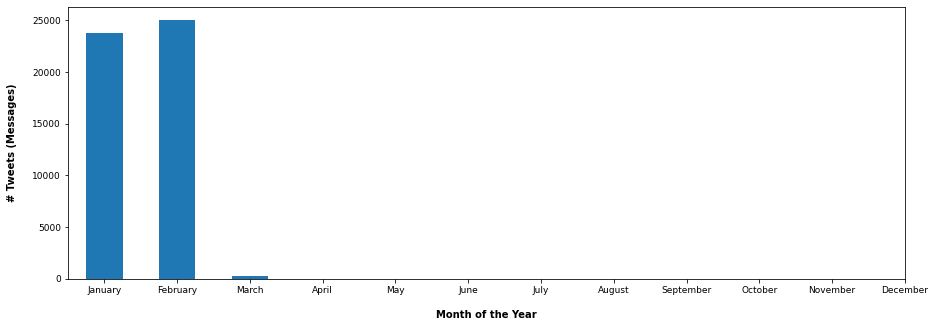

In [63]:
monthly_plot = monthly_count['Number_of_tweets'].plot(kind='bar')
months = list(calendar.month_name[1:])                                    #GENERATE LIST OF MONTHS
xticks(np.arange(12), months, rotation = 0,fontsize = 9)                  #USE THE CUSTOM TICKS

monthly_plot.set_xlabel('Month of the Year', weight='bold', labelpad=15)  #SET X-AXIS LABEL, ADD PADDING TO TOP OF X-AXIS LABEL
monthly_plot.set_ylabel('# Tweets (Messages)', weight='bold', labelpad=15) #SET Y-AXIS LABEL, ADD PADDING TO RIGHT OF Y-AXIS LABEL

xticks(fontsize = 9, rotation = 0, ha= "center")                          #SET FONT SIZE FOR X-AXIS TICK LABELS
yticks(fontsize = 9)                                                      #SET FONT SIZE FOR Y-AXIS TICK LABELS
daily_plot.tick_params(axis='x', pad=5)                                   #SET PADDING ABOVE X-AXIS LABELS

daily_plot.legend_ = None                                                 #TURN OFF LEGEND

savefig('monthly counts - bar graph.png', bbox_inches='tight', dpi=300, format='png')

Getting Ridiculous: Number of Tweets per Minute

In case you ever wanted to, you can also access the minute at which the tweets were posted. Note that the minute attribute refers to the minute of the hour, not the minute of the day. That is, the n is 60.


In [65]:
minute_count = df.groupby(df.index.minute).apply(f)
print( len(minute_count))
minute_count.head()

60


,Number_of_tweets
created_at,
0,916
1,915
2,914
3,866
4,826


we will just use the default plot here. There appears to be a spike at the 1st and 30th minutes of each hour. Probably due to automatic scheduling of tweets.

<AxesSubplot:xlabel='created_at'>

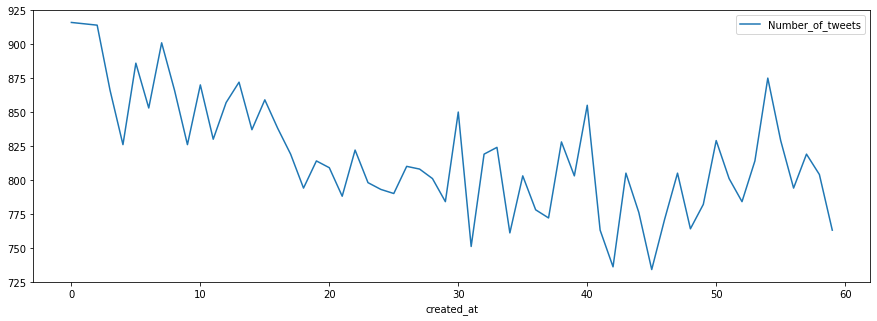

In [66]:
minute_count.plot()

Super Ridiculous: Number of Tweets per Second

Note that the second attribute refers to the second of the minute, so the n is 60.


In [68]:
second_count = df.groupby(df.index.second).apply(f)
print(len(second_count))
second_count.head()

60


,Number_of_tweets
created_at,
0,850
1,772
2,870
3,826
4,783


Not much useful information here. There are spikes at the first, second, and third seconds of the minute, probably also due to automated scheduling of the tweets.

<AxesSubplot:xlabel='created_at'>

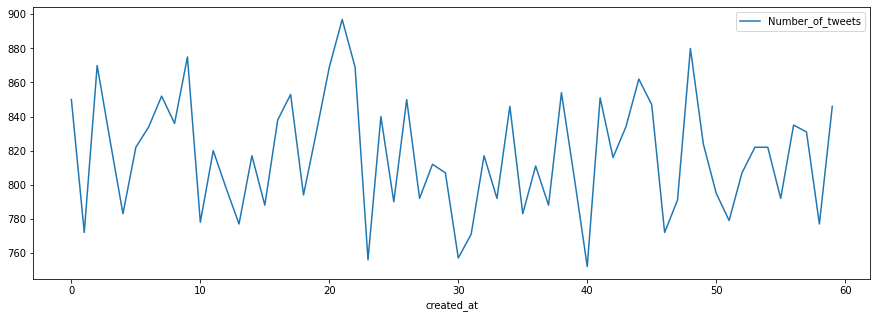

In [69]:
second_count.plot()

Alternative Plotting Styles

I like the Seaborn styles shown above. However, you might want to play around with some of the other styles available to you. First, let's try the plot with the 'default' mpl_style. For each style, I'll show you a line plot (# of tweets per day of the year) and a bar graph (# of tweets per day of the week).


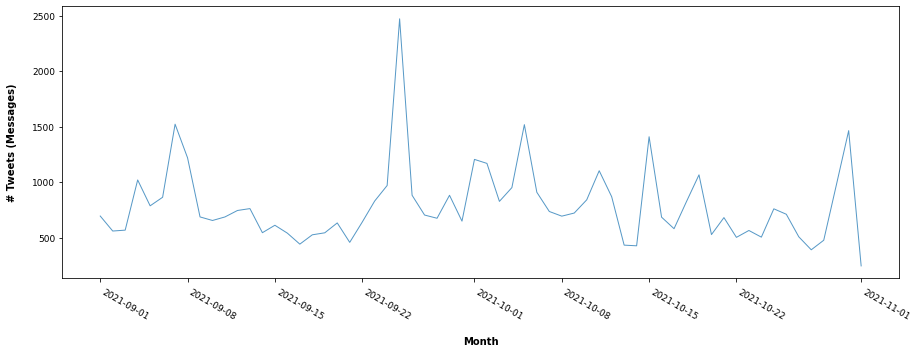

In [72]:
plt.rcParams['figure.figsize'] = (15, 5)
daily_plot = daily_count['Number_of_tweets'].plot(kind='line', lw=1, alpha=0.75, legend=True, x_compat=True)

daily_plot.set_xlabel('Month', weight='bold', labelpad=15)    #SET X-AXIS LABEL; ADD PADDING TO TOP OF LABEL
daily_plot.set_ylabel('# Tweets (Messages)', weight='bold', labelpad=15) #SET Y-AXIS LABEL; ADD PADDING TO RIGHT OF LABEL

xticks(fontsize = 9, rotation = -30, ha ="left")  #SET FONT PROPERTIES OF X-AXIS TICK LABELS
yticks(fontsize = 9)                              #SET FONT PROPERTIES OF Y-AXIS TICK LABELS
daily_plot.legend_ = None
daily_plot.tick_params(axis='x', pad=5)

([<matplotlib.axis.XTick at 0x2556cda7a60>,
 [Text(0, 0, 'Monday'),
  Text(1, 0, 'Tuesday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Friday'),
  Text(5, 0, 'Saturday'),
  Text(6, 0, 'Sunday')])

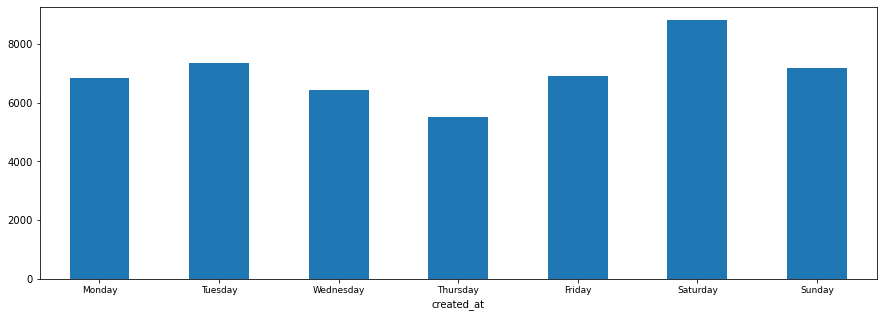

In [73]:
day_of_week_plot = weekday_count['Number_of_tweets'].plot(kind='bar')
xticks(np.arange(7), weekday_count['day'], rotation = 0, fontsize = 9)

Try Matplotlib's ggplot style

Matplotlib 1.4 also comes with five different built-in styles. Let's try them all out.


In [74]:
mpl.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']


First, let's run it in dark_background style. We only have to run the following line of code and then all subsequent plots will be run in this style.


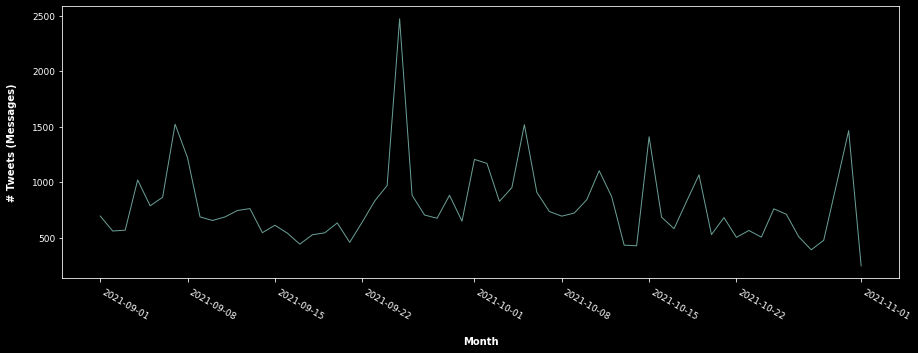

In [75]:
mpl.style.use('dark_background')
daily_plot = daily_count['Number_of_tweets'].plot(kind='line', lw=1, alpha=0.75, legend=True, x_compat=True)
daily_plot.set_xlabel('Month', weight='bold', labelpad=15)    #SET X-AXIS LABEL; ADD PADDING TO TOP OF LABEL
daily_plot.set_ylabel('# Tweets (Messages)', weight='bold', labelpad=15) #SET Y-AXIS LABEL; ADD PADDING TO RIGHT OF LABEL
xticks(fontsize = 9, rotation = -30, ha ="left")  #SET FONT PROPERTIES OF X-AXIS TICK LABELS
yticks(fontsize = 9)                              #SET FONT PROPERTIES OF Y-AXIS TICK LABELS
daily_plot.legend_ = None
daily_plot.tick_params(axis='x', pad=5)

([<matplotlib.axis.XTick at 0x2556ce76880>,
 [Text(0, 0, 'Monday'),
  Text(1, 0, 'Tuesday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Friday'),
  Text(5, 0, 'Saturday'),
  Text(6, 0, 'Sunday')])

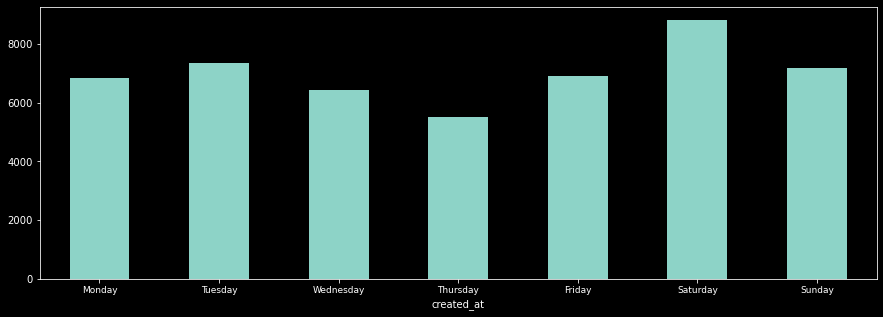

In [76]:
day_of_week_plot = weekday_count['Number_of_tweets'].plot(kind='bar')
xticks(np.arange(7), weekday_count['day'], rotation = 0, fontsize = 9)

Now let's run it in bmh style

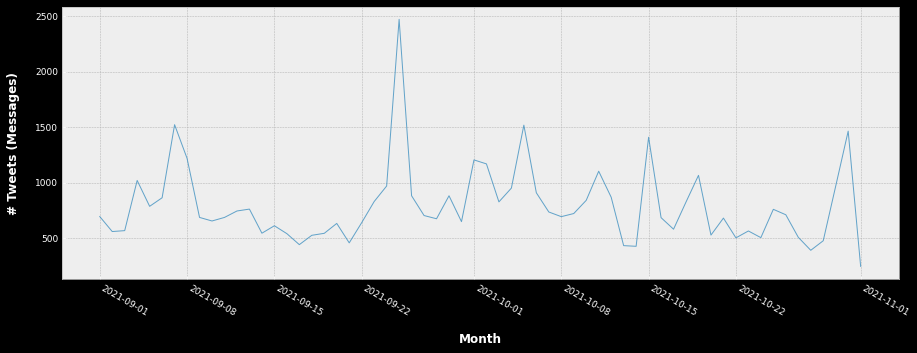

In [78]:
mpl.style.use('bmh')
daily_plot = daily_count['Number_of_tweets'].plot(kind='line', lw=1, alpha=0.75, legend=True, x_compat=True)
daily_plot.set_xlabel('Month', weight='bold', labelpad=15)    #SET X-AXIS LABEL; ADD PADDING TO TOP OF LABEL
daily_plot.set_ylabel('# Tweets (Messages)', weight='bold', labelpad=15) #SET Y-AXIS LABEL; ADD PADDING TO RIGHT OF LABEL
xticks(fontsize = 9, rotation = -30, ha ="left")  #SET FONT PROPERTIES OF X-AXIS TICK LABELS
yticks(fontsize = 9)                              #SET FONT PROPERTIES OF Y-AXIS TICK LABELS
daily_plot.legend_ = None
daily_plot.tick_params(axis='x', pad=5)

([<matplotlib.axis.XTick at 0x2556cf4a6d0>,
 [Text(0, 0, 'Monday'),
  Text(1, 0, 'Tuesday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Friday'),
  Text(5, 0, 'Saturday'),
  Text(6, 0, 'Sunday')])

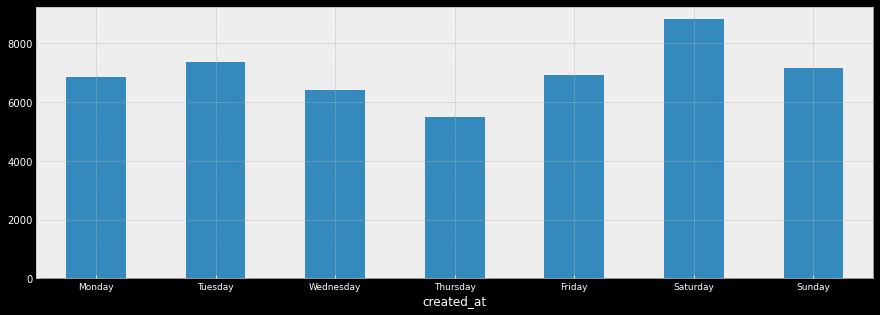

In [79]:
day_of_week_plot = weekday_count['Number_of_tweets'].plot(kind='bar')
xticks(np.arange(7), weekday_count['day'], rotation = 0, fontsize = 9)

Now in grayscale style

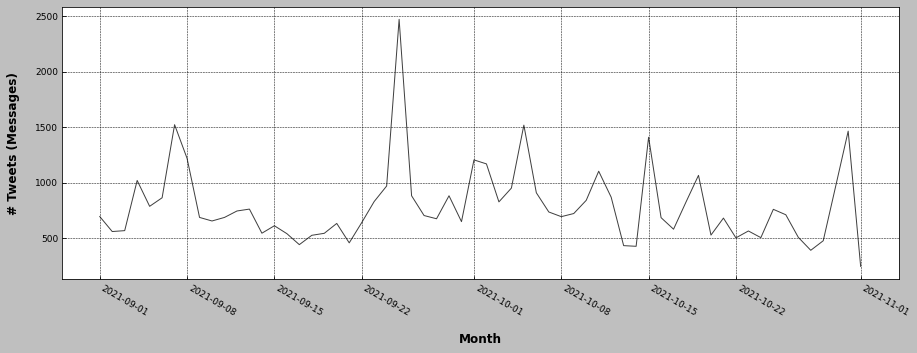

In [80]:
mpl.style.use('grayscale')
daily_plot = daily_count['Number_of_tweets'].plot(kind='line', lw=1, alpha=0.75, legend=True, x_compat=True)
daily_plot.set_xlabel('Month', weight='bold', labelpad=15)    #SET X-AXIS LABEL; ADD PADDING TO TOP OF LABEL
daily_plot.set_ylabel('# Tweets (Messages)', weight='bold', labelpad=15) #SET Y-AXIS LABEL; ADD PADDING TO RIGHT OF LABE
xticks(fontsize = 9, rotation = -30, ha ="left")  #SET FONT PROPERTIES OF X-AXIS TICK LABELS
yticks(fontsize = 9)                              #SET FONT PROPERTIES OF Y-AXIS TICK LABELS
daily_plot.legend_ = None
daily_plot.tick_params(axis='x', pad=5)

([<matplotlib.axis.XTick at 0x2556dd2f8e0>,
 [Text(0, 0, 'Monday'),
  Text(1, 0, 'Tuesday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Friday'),
  Text(5, 0, 'Saturday'),
  Text(6, 0, 'Sunday')])

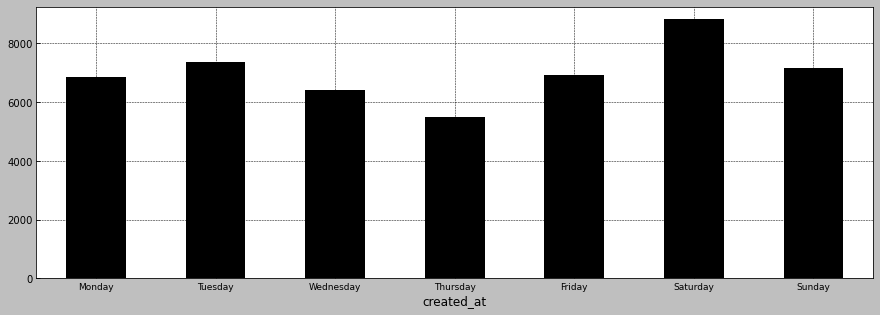

In [81]:
day_of_week_plot = weekday_count['Number_of_tweets'].plot(kind='bar')
xticks(np.arange(7), weekday_count['day'], rotation = 0, fontsize = 9)

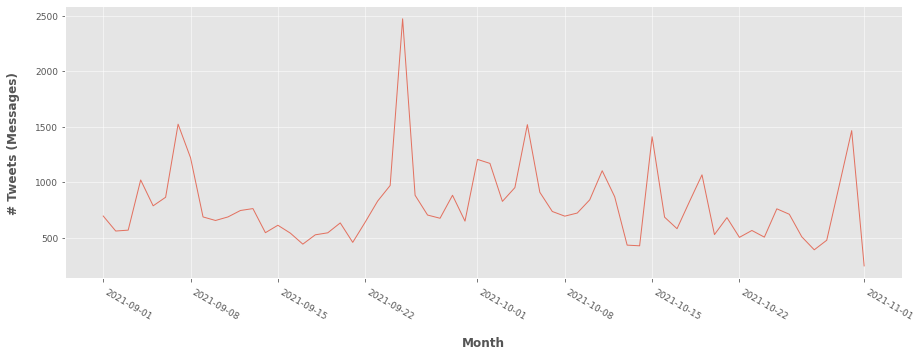

In [83]:
mpl.style.use('ggplot')
daily_plot = daily_count['Number_of_tweets'].plot(kind='line', lw=1, alpha=0.75, legend=True, x_compat=True)
daily_plot.set_xlabel('Month', weight='bold', labelpad=15)    #SET X-AXIS LABEL; ADD PADDING TO TOP OF LABEL
daily_plot.set_ylabel('# Tweets (Messages)', weight='bold', labelpad=15) #SET Y-AXIS LABEL; ADD PADDING TO RIGHT OF LABEL
xticks(fontsize = 9, rotation = -30, ha ="left")  #SET FONT PROPERTIES OF X-AXIS TICK LABELS
yticks(fontsize = 9)                              #SET FONT PROPERTIES OF Y-AXIS TICK LABELS
daily_plot.legend_ = None
daily_plot.tick_params(axis='x', pad=5)

([<matplotlib.axis.XTick at 0x2556de04a60>,
 [Text(0, 0, 'Monday'),
  Text(1, 0, 'Tuesday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Friday'),
  Text(5, 0, 'Saturday'),
  Text(6, 0, 'Sunday')])

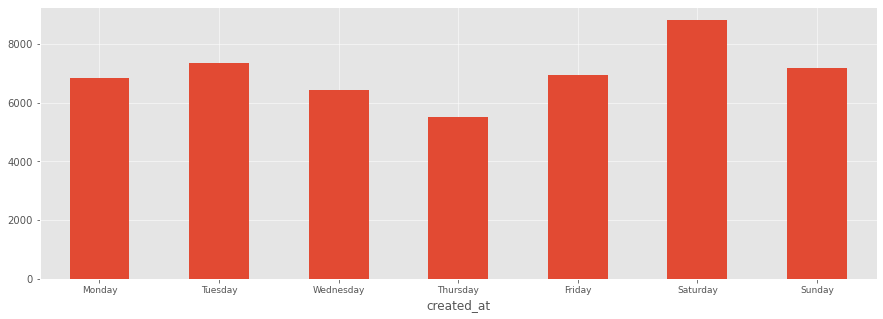

In [84]:
day_of_week_plot = weekday_count['Number_of_tweets'].plot(kind='bar')
xticks(np.arange(7), weekday_count['day'], rotation = 0, fontsize = 9)

Finally, let's run it in fivethirtyeight style, so named after Nate Silver's statistics site http://fivethirtyeight.com/

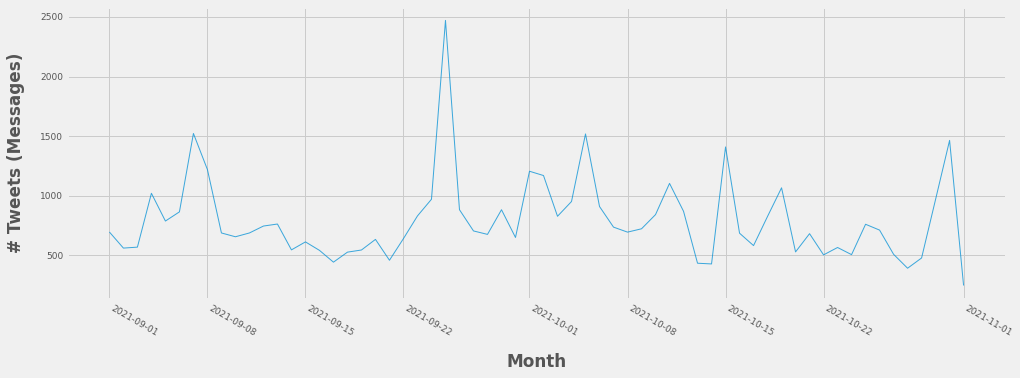

In [85]:
mpl.style.use('fivethirtyeight')
daily_plot = daily_count['Number_of_tweets'].plot(kind='line', lw=1, alpha=0.75, legend=True, x_compat=True)
daily_plot.set_xlabel('Month', weight='bold', labelpad=15)    #SET X-AXIS LABEL; ADD PADDING TO TOP OF LABEL
daily_plot.set_ylabel('# Tweets (Messages)', weight='bold', labelpad=15) #SET Y-AXIS LABEL; ADD PADDING TO RIGHT OF LABEL
xticks(fontsize = 9, rotation = -30, ha ="left")  #SET FONT PROPERTIES OF X-AXIS TICK LABELS
yticks(fontsize = 9)                              #SET FONT PROPERTIES OF Y-AXIS TICK LABELS
daily_plot.legend_ = None
daily_plot.tick_params(axis='x', pad=5)

([<matplotlib.axis.XTick at 0x2556ced7550>,
 [Text(0, 0, 'Monday'),
  Text(1, 0, 'Tuesday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Friday'),
  Text(5, 0, 'Saturday'),
  Text(6, 0, 'Sunday')])

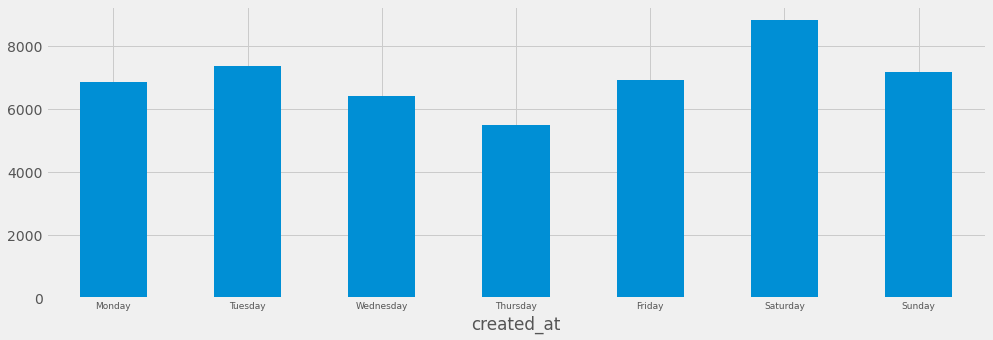

In [86]:
day_of_week_plot = weekday_count['Number_of_tweets'].plot(kind='bar')
xticks(np.arange(7), weekday_count['day'], rotation = 0, fontsize = 9)

Finally this data set is for only one account and one month we can grap data for long time and see all charts that can help in analyzing the account managment department are they do their job right or NOT


# THANK YOU FOR YOUR TIME TO TEACH ME DR CHEIK AND DR MARIYAM

STUDENT MOHAMMAD SULIMAN ALOWIBDI

0549797697